<a href="https://colab.research.google.com/github/LK2705/AI-Projects-LAUNCHED/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Keep only relevant columns
df = df[['Product', 'Purchase Address']].dropna()
df.head()


,Product,Purchase Address
0,USB-C Charging Cable,"917 1st St, Dallas, TX 75001"
2,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215"
3,Google Phone,"669 Spruce St, Los Angeles, CA 90001"
4,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001"
5,Wired Headphones,"333 8th St, Los Angeles, CA 90001"


In [2]:
import re

# Clean the product text
df['clean_product'] = df['Product'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x.lower()))
df.head()


,Product,Purchase Address,clean_product
0,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",usbc charging cable
2,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",bose soundsport headphones
3,Google Phone,"669 Spruce St, Los Angeles, CA 90001",google phone
4,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",wired headphones
5,Wired Headphones,"333 8th St, Los Angeles, CA 90001",wired headphones


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_product'])

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (18324, 33)


In [4]:
from collections import Counter
import itertools

words = list(itertools.chain.from_iterable([text.split() for text in df['clean_product']]))
common_words = Counter(words).most_common(10)
print("Top 10 Common Words:", common_words)


Top 10 Common Words: [('headphones', 4685), ('charging', 4280), ('cable', 4280), ('batteries', 4052), ('pack', 4052), ('in', 2337), ('monitor', 2337), ('lightning', 2201), ('usbc', 2079), ('aa', 2063)]


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

df[['Product', 'Cluster']].head(10)


,Product,Cluster
0,USB-C Charging Cable,1
2,Bose SoundSport Headphones,2
3,Google Phone,4
4,Wired Headphones,2
5,Wired Headphones,2
6,USB-C Charging Cable,1
7,Bose SoundSport Headphones,2
8,USB-C Charging Cable,1
9,Macbook Pro Laptop,1
10,Wired Headphones,2


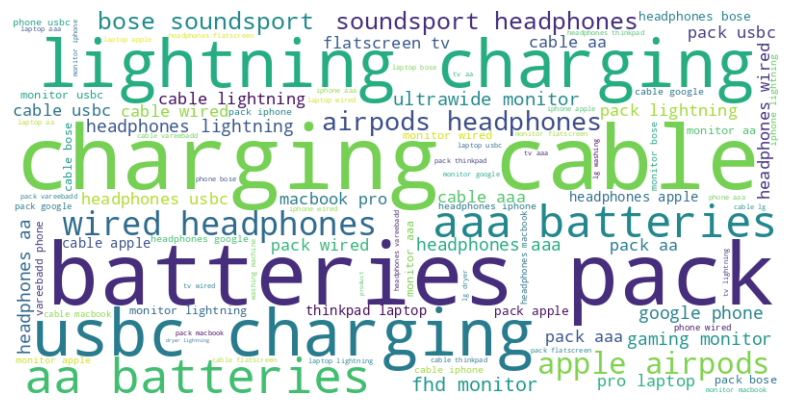

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['clean_product'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
